# Basic Overview

In [16]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

In [38]:
# number of classes and names

class_names = [name for name in os.listdir("raw-img/")]

print(class_names, f'Number of classes: {len(class_names)}')

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel'] Number of classes: 10


In [3]:
# images per class

imgs_count = {}

dir = "raw-img/"

for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    imgs_count[class_name] = len(os.listdir(class_path))
    
imgs_count

{'butterfly': 2112,
 'cat': 1668,
 'chicken': 3098,
 'cow': 1866,
 'dog': 4863,
 'elephant': 1446,
 'horse': 2623,
 'sheep': 1820,
 'spider': 4821,
 'squirrel': 1862}

In [4]:
# total images in the dataset

total_images = 0

for class_name in imgs_count.items():
    total_images += class_name[1]
    
print(f"Total number of images in the dataset: {total_images}")

Total number of images in the dataset: 26179


In [5]:
# check images resolutions

img_res = []
height = []
width = []

for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        with Image.open(image_path) as img:
            img_res.append(img.size)
            height.append(img.height)
            width.append(img.width)
            
print(img_res[:15])

[(426, 640), (640, 457), (426, 640), (425, 640), (426, 640), (640, 454), (640, 426), (640, 439), (640, 416), (640, 375), (640, 386), (640, 426), (640, 426), (640, 480), (640, 546)]


In [6]:
# check how many images are below (256, 256) size(required size for pre-trained model)

low_res = [img for img in img_res if img[0] < 256 and img[1] < 256]

len(low_res)

295

### In basic overview section I found out names of classes and how many of them in the dataset. Also, I checked how many images are per class and total size of the dataset. Furthermore, from image resolution section I can see that there are not a lot of images with resolution lower that cnn model will require, which is not a big problem. 

# Visualization part

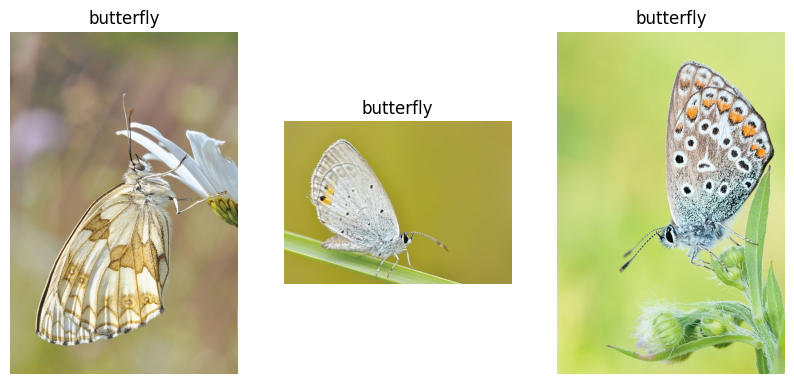

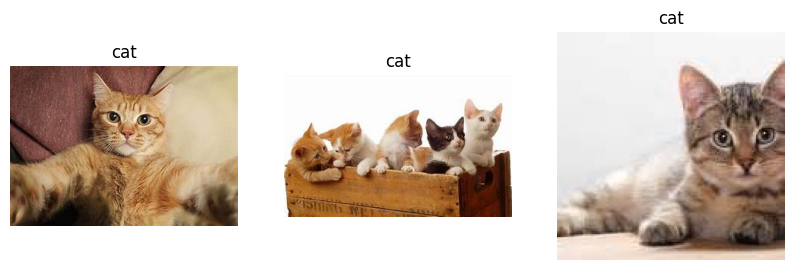

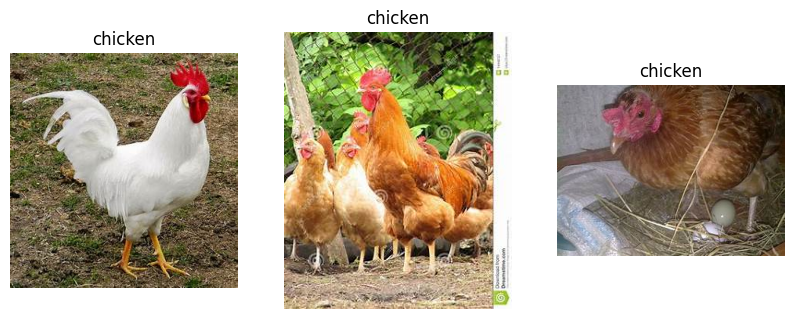

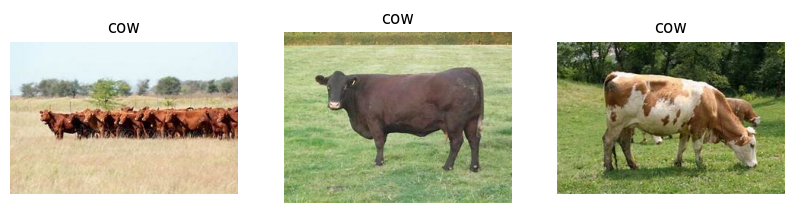

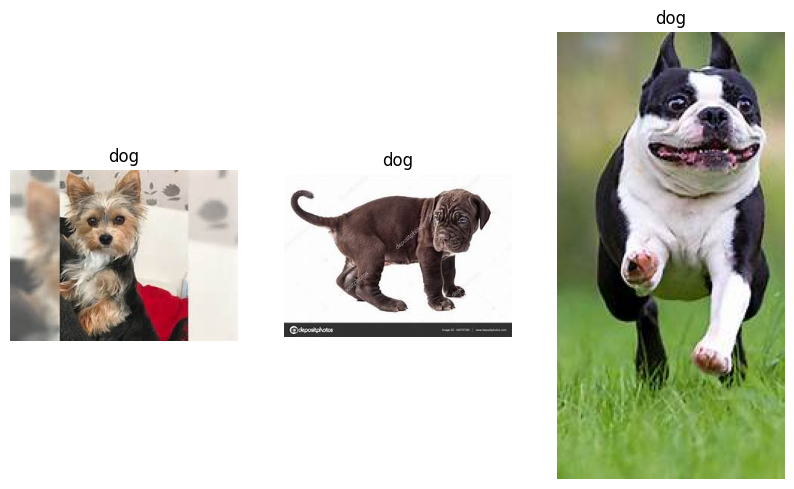

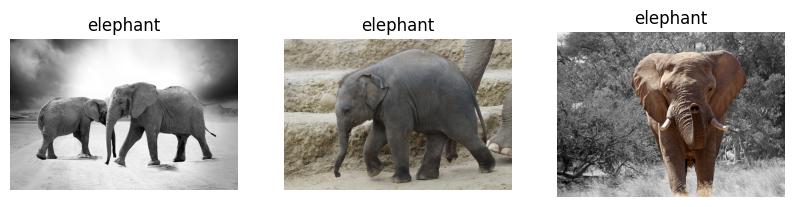

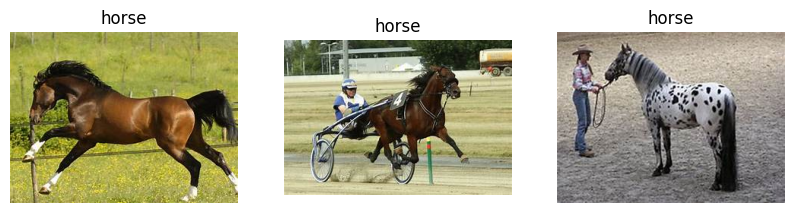

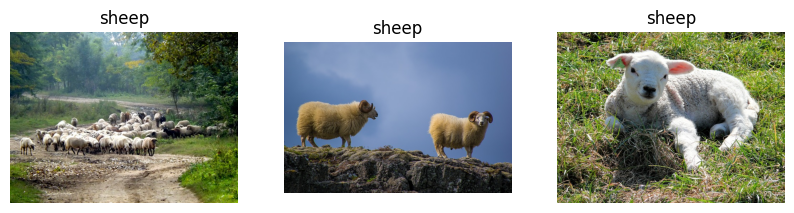

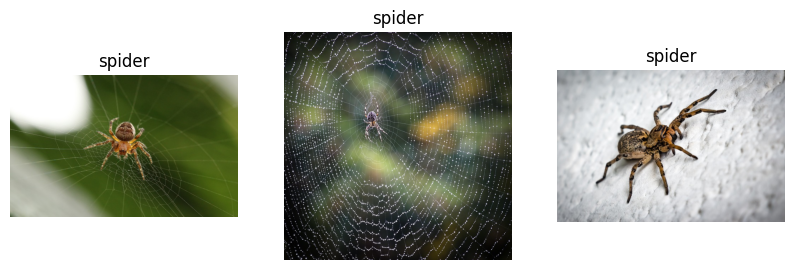

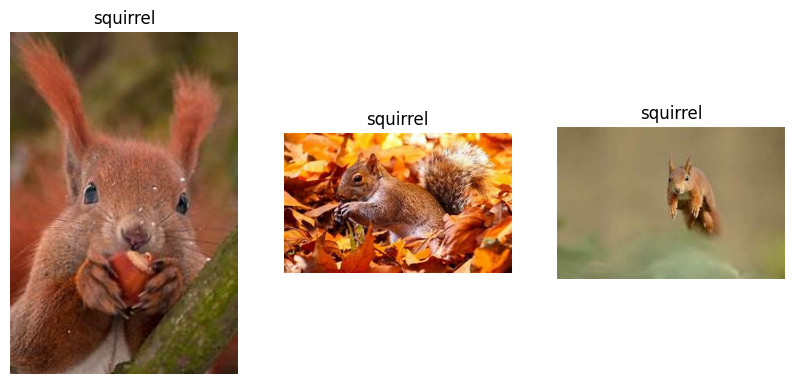

In [24]:
# image observation

import numpy as np
dir = "raw-img/"

for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    
    plt.figure(figsize=(10, 8))
    for i, image in enumerate(os.listdir(class_path)[:3]):
        image_path = os.path.join(class_path, image)
        img = np.asarray(Image.open(image_path))
        
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(f'{class_name}')
        plt.axis("off")
        
    plt.show()

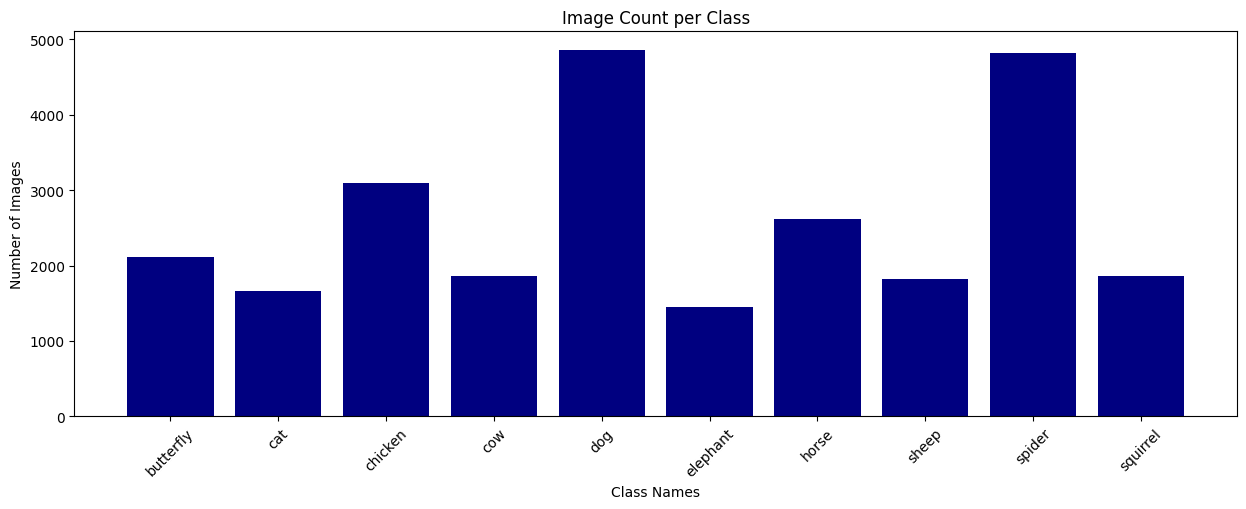

In [7]:
# histogram of images distribution per class

plt.figure(figsize=(15, 5))
plt.bar(imgs_count.keys(), imgs_count.values(), color='navy')
plt.xlabel("Class Names")
plt.ylabel("Number of Images")
plt.title("Image Count per Class")
plt.xticks(rotation=45)
plt.show()

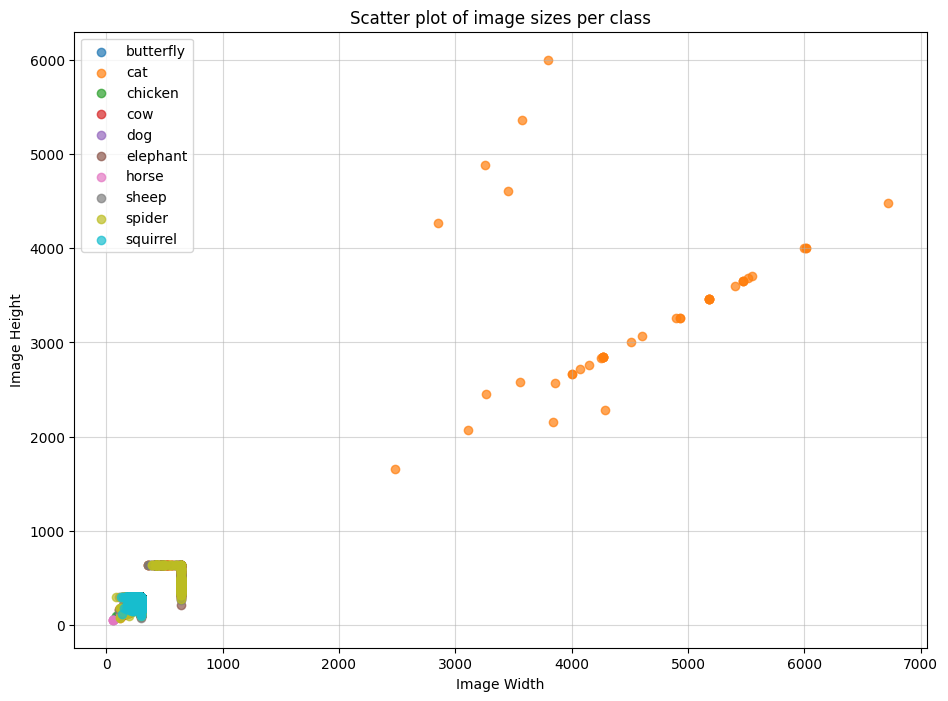

In [36]:
# height-width relationship plot of each class

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

dir = "raw-img/"
class_sizes = {}  

for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    sizes = []  

    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        with Image.open(image_path) as img:
            sizes.append((img.width, img.height))

        class_sizes[class_name] = sizes

plt.figure(figsize=(11, 8))

for class_name, sizes in class_sizes.items():
    widths, heights = zip(*sizes) # extracting width and height from tuples
    plt.scatter(widths, heights, label=class_name, alpha=0.7)

plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.title("Scatter plot of image sizes per class")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

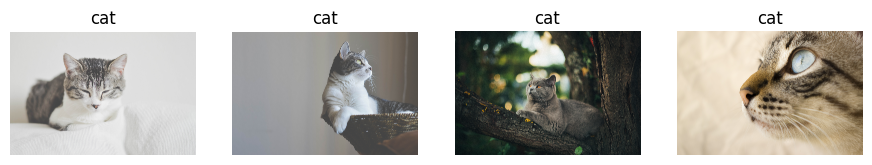

In [32]:
# let's investigate these high-resolution images

plt.figure(figsize=(11, 8))
i = 1

for class_name in os.listdir(dir):
    class_path = os.path.join(dir, class_name)
    
    for image in os.listdir(class_path):
        if i > 4:
            break
    
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        with Image.open(image_path) as img:
            if img.height > 3900 and img.width > 5900:
                img = np.asarray(Image.open(image_path))
                plt.subplot(1, 4, i)
                plt.imshow(img)
                plt.title(f'{class_name}')
                plt.axis("off")
                i += 1
plt.show()

### In visualization part I plotted some images of each class and can make a conclusion that the most images per class have dog and spider classes, other are relatively equal. Moreover, from the height-width scatter plot I can see that most of the images are don't go beyond 700 pixels in size, however there are a small subset of images with large resolutions. Since, I will compress them to a smaller size for cnn model it is not a big deal. Most of the images with high resolution are cats and only a few of them are cows. For visual purposes I plotted 4 biggest images to observe them.